In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from array import array

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
inputData = pd.read_excel(r'/Users/whitney/Downloads/Volumetric_features.xlsx', engine='openpyxl')

inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [4]:
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
##Gaussian Naive Bayes

gnb = GaussianNB()

In [6]:
# check the model's performance on unseen, test data
predictions = gnb.fit(X_train, y_train).predict(X_test)

print(gnb)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

GaussianNB()
r square value: 0.6603583156616515
mean absolute error (years): 8.692671394799055
mean square error: 140.82269503546098
root mean sqaure error (years): 11.866873852681715


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

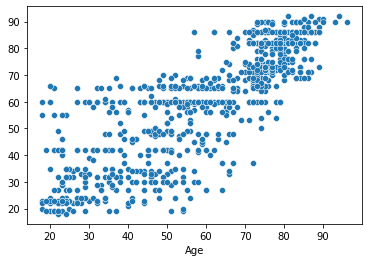

In [7]:
#Plots

import seaborn as sns
sns.scatterplot(y_test, predictions)

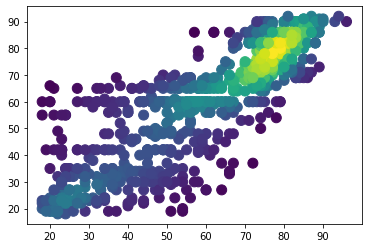

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculating point density
xy = np.vstack([y_test,predictions])
z = gaussian_kde(xy)(xy)

#Plotting
fig,ax = plt.subplots()
ax.scatter(y_test, predictions, c=z, s=100)
plt.show()